# Performance Analysis and Visualisation of Company Operations

### Import Libraries

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load datasets

In [112]:
deliveries_df = pd.read_csv('C:/Users/MDTAN/OneDrive/Desktop/new project 2025/Deliveries.csv')
warehouse_ops_df = pd.read_csv('C:/Users\MDTAN/OneDrive/Desktop/new project 2025/Warehouse_Operations.csv')
fuel_costs_df = pd.read_csv('C:/Users/MDTAN/OneDrive/Desktop/new project 2025/Fuel_Costs.csv')


### Display first few rows to check the data

In [113]:
print(deliveries_df.head())
print(warehouse_ops_df.head())
print(fuel_costs_df.head())

  Delivery_ID Warehouse_ID Region Vehicle_Type Delivery_Date  Delivery_Time  \
0          D1           W7   East          Van    2024-08-16            120   
1          D2           W2  South        Truck    2024-06-18            179   
2          D3           W4  North          Van    2024-09-04            265   
3          D4           W2  North          Van    2024-05-16             48   
4          D5           W1   East        Truck    2024-06-20            103   

  Delay_Status  Customer_Feedback  
0      Delayed                  1  
1      Delayed                  4  
2      Delayed                  5  
3      On Time                  3  
4      Delayed                  4  
  Warehouse_ID Region Staff_Count  Processing_Time_Avg  Operational_Cost
0           W1   West          21                   36             16111
1           W2  North          42                   38             17737
2           W3  North          47                   53             19320
3           W4   

# Data Cleaning

### Remove Duplicates

In [114]:
deliveries_df.drop_duplicates(inplace=True)
warehouse_ops_df.drop_duplicates(inplace=True)
fuel_costs_df.drop_duplicates(inplace=True)


### Verify duplicates are removed

In [115]:
print(deliveries_df.duplicated().sum())  
print(warehouse_ops_df.duplicated().sum())
print(fuel_costs_df.duplicated().sum())

0
0
0


### Verify date format

In [116]:
print(deliveries_df["Delivery_Date"].head())  

0    2024-08-16
1    2024-06-18
2    2024-09-04
3    2024-05-16
4    2024-06-20
Name: Delivery_Date, dtype: object


### Check for Missing Data

In [117]:
print(deliveries_df.isnull().sum())  
print(warehouse_ops_df.isnull().sum())
print(fuel_costs_df.isnull().sum())

Delivery_ID          0
Warehouse_ID         0
Region               0
Vehicle_Type         0
Delivery_Date        0
Delivery_Time        0
Delay_Status         0
Customer_Feedback    0
dtype: int64
Warehouse_ID           0
Region                 1
Staff_Count            0
Processing_Time_Avg    0
Operational_Cost       0
dtype: int64
Vehicle_Type          0
Fuel_Cost_Per_Mile    0
Miles_Covered         0
dtype: int64


### drop Missing Data

In [118]:
deliveries_df.dropna(inplace=True)
warehouse_ops_df.dropna(inplace=True)
fuel_costs_df.dropna(inplace=True)

### Merge datasets 

In [119]:
merged_data = pd.merge(deliveries_df, warehouse_ops_df, on='Warehouse_ID')

# Exploratory Data Analysis (EDA)

### What percentage of deliveries are delayed?

In [120]:
delayed = deliveries_df['Delay_Status'].value_counts(normalize=True) * 100
print("Delayed Deliveries Percentage:\n", delayed)

Delayed Deliveries Percentage:
 Delay_Status
Delayed    52.2
On Time    47.8
Name: proportion, dtype: float64


### Which region has the highest delivery delays?

In [121]:
region_delays = deliveries_df[deliveries_df['Delay_Status'] == 'Delayed']['Region'].value_counts()
print("Delays by Region:\n", region_delays)


Delays by Region:
 Region
East     274
West     261
North    260
South    249
Name: count, dtype: int64


### What is the relationship between customer feedback and delays?

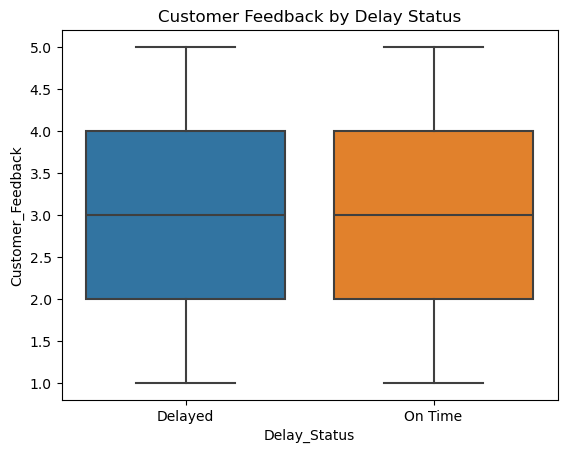

In [122]:
sns.boxplot(data=deliveries_df, x='Delay_Status', y='Customer_Feedback')
plt.title('Customer Feedback by Delay Status')
plt.savefig('ustomer Feedback by Delay Status.jpg')
plt.show()


### Which warehouses have the highest operational costs?

In [123]:
cost_by_warehouse = warehouse_ops_df.groupby('Warehouse_ID')['Operational_Cost'].sum()
print(cost_by_warehouse)

Warehouse_ID
W1     16111
W10     5205
W2     17737
W3     19320
W5      7588
W6     17486
W7      9082
W8     12261
W9      9870
Name: Operational_Cost, dtype: int64


# Data Visualisation


### Delivery delays by Region

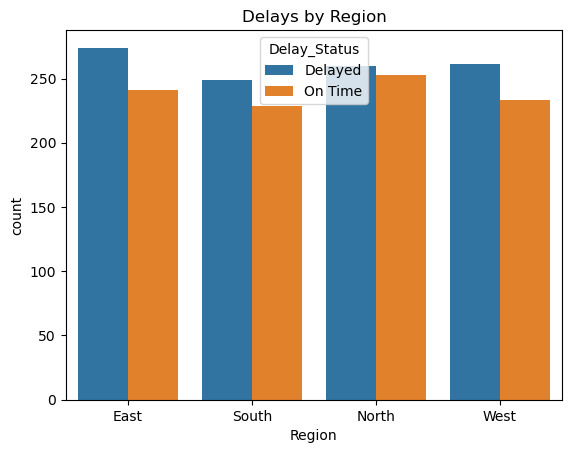

In [124]:
sns.countplot(data=deliveries_df, x='Region', hue='Delay_Status')
plt.title('Delays by Region')
plt.savefig('delays_by_region.jpg')
plt.show()


### Delivery delays by vehicle type.

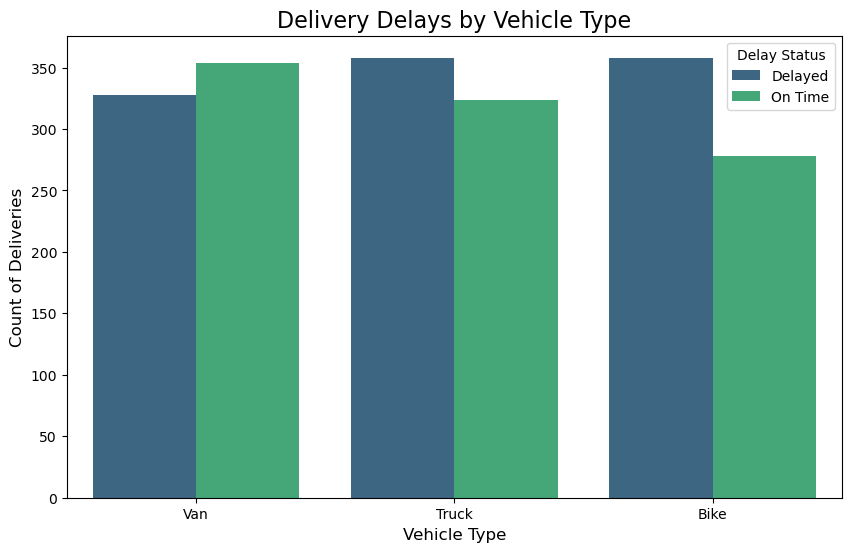

In [125]:

plt.figure(figsize=(10, 6))  # Set figure size
sns.countplot(data=deliveries_df, x='Vehicle_Type', hue='Delay_Status', palette='viridis')  # Create the bar chart
plt.title('Delivery Delays by Vehicle Type', fontsize=16) 
plt.xlabel('Vehicle Type', fontsize=12) 
plt.ylabel('Count of Deliveries', fontsize=12) 
plt.legend(title='Delay Status') 
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  

# Save and show the plot
plt.savefig('delivery_delays_by_vehicle_type.jpg', dpi=300, bbox_inches='tight')  # Save the plot
plt.show() 


### Operational costs across warehouses.

C:\Users\MDTAN\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


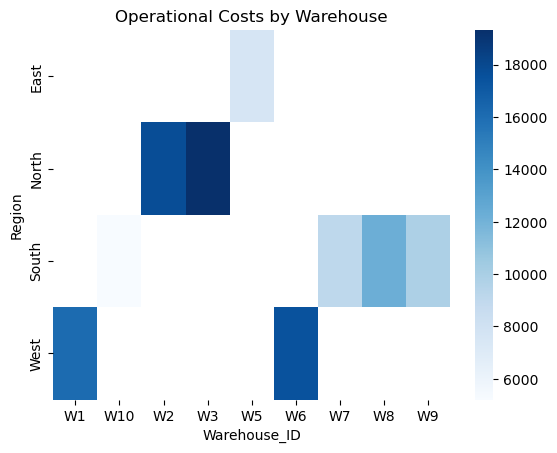

In [126]:
pivot_data = warehouse_ops_df.pivot_table(values='Operational_Cost', index='Region', columns='Warehouse_ID')
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='Blues')
plt.title('Operational Costs by Warehouse')
plt.savefig('perational Costs by Warehouse.png', dpi=300, bbox_inches='tight')
plt.show()


### Delivery delays over time.

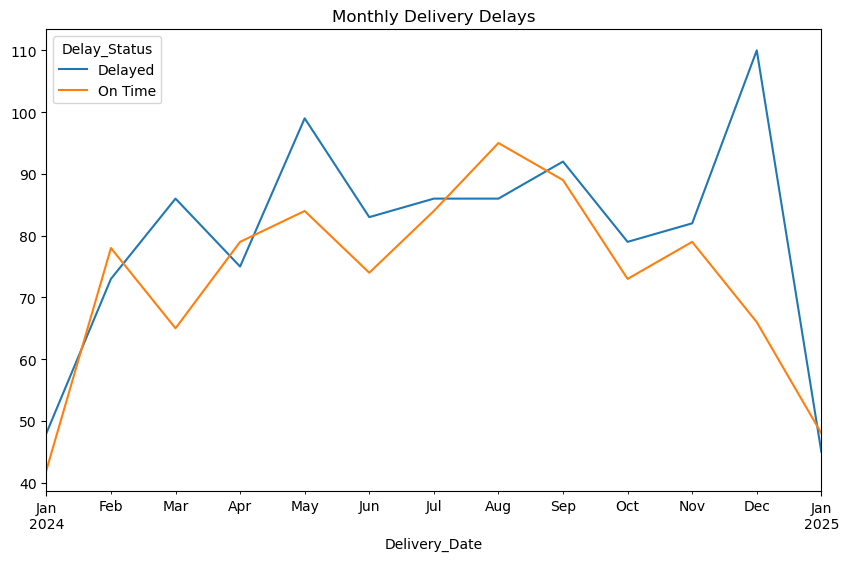

In [127]:
deliveries_df['Delivery_Date'] = pd.to_datetime(deliveries_df['Delivery_Date'])
time_trend = deliveries_df.groupby(deliveries_df['Delivery_Date'].dt.to_period('M'))['Delay_Status'].value_counts()
time_trend.unstack().plot(kind='line', figsize=(10, 6))
plt.title('Monthly Delivery Delays')
plt.savefig('Monthly Delivery Delays.png', dpi=300, bbox_inches='tight')
plt.show()

### Fuel Cost Per Mile by Vehicle Type

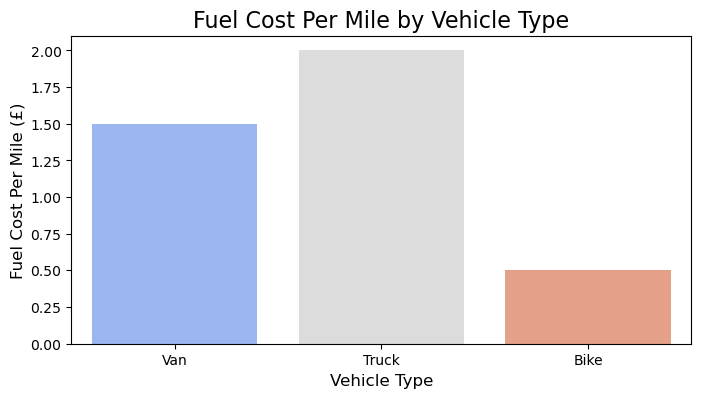

In [128]:
plt.figure(figsize=(8, 4))  # Set figure size
sns.barplot(data=fuel_costs_df, x='Vehicle_Type', y='Fuel_Cost_Per_Mile', palette='coolwarm') 
plt.title('Fuel Cost Per Mile by Vehicle Type', fontsize=16)  
plt.xlabel('Vehicle Type', fontsize=12)  
plt.ylabel('Fuel Cost Per Mile (£)', fontsize=12) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)  

plt.savefig('fuel_cost_per_mile.jpg', dpi=300, bbox_inches='tight')  
plt.show()  
